In [1]:
import numpy as np
import matplotlib.pyplot as plt


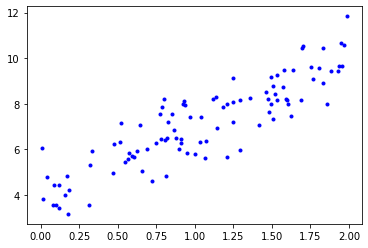

In [2]:
X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100, 1)

plt.plot(X, y, 'b.')
plt.show()

In [3]:
X_b = np.c_[np.ones((100,1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.03134144],
       [2.97450431]])

In [4]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.03134144],
       [9.98035007]])

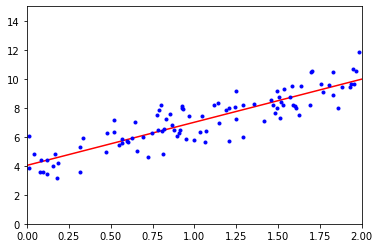

In [5]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0,2,0,15])
plt.show()

In [6]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.03134144]), array([[2.97450431]]))

In [7]:
theta_best_svd, residuals, rank, s =np.linalg.lstsq(X_b, y, rcond = 1e-6)
theta_best_svd

array([[4.03134144],
       [2.97450431]])

In [8]:
np.linalg.pinv(X_b).dot(y)

array([[4.03134144],
       [2.97450431]])

In [9]:
eta = 0.1 # Learning Rate 
n_iterations = 1000 
m = 100

theta = np.random.randn(2, 1)

for iteration in range(n_iterations): 
    gradients= 2/m * X_b.T.dot(X_b.dot(theta) - y) 
    theta = theta - eta * gradients

theta

array([[4.03134144],
       [2.97450431]])

In [10]:
n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
    return t0 / (t0 + t1)

theta = np.random.randn(2, 1)
for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index: random_index+1]
        yi = y[random_index: random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        
theta

array([[4.37798993],
       [2.9920985 ]])

In [12]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter = 1000, tol = 1e-3, penalty = None, eta0 = 0.1)
sgd_reg.fit(X, y.ravel())

sgd_reg.intercept_, sgd_reg.coef_

(array([3.97629538]), array([2.95258811]))

# Polynomial Regression

[-0.90576642]
[-0.90576642  0.8204128 ]


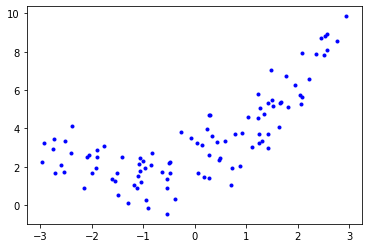

In [25]:
m = 100 
X = 6 * np.random.rand(m, 1) -3
y = 0.5 * X**2 + X + 2+ np.random.randn(m, 1)

from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree = 2, include_bias = False)
X_poly = poly_features.fit_transform(X)
print(X[0])
print(X_poly[0])


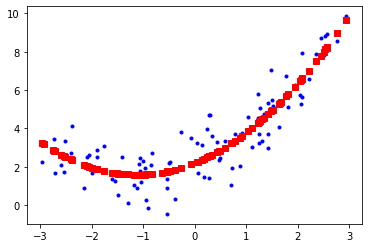

In [57]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

plt.plot(X, y, "b.")
plt.plot(X, lin_reg.coef_[0, 1]* X **2 + lin_reg.coef_[0, 0]* X + lin_reg.intercept_, 'rs')
plt.show()